<a href="https://colab.research.google.com/github/enggisabrilla/Prediksi-Harga-Tiket-Pesawat/blob/main/PROGRAM_(Prediksi_Harga_Tiket_Pesawat).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import tensorflow as tf
import seaborn as sns

In [ ]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

ls: cannot access 'kaggle.json': No such file or directory


In [ ]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
%mkdir -p ~/.kaggle
%cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d shubhambathwal/flight-price-prediction

Dataset URL: https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction
License(s): CC0-1.0
  0% 0.00/4.16M [00:00<?, ?B/s]
100% 4.16M/4.16M [00:00<00:00, 75.6MB/s]


In [ ]:
!unzip flight-price-prediction.zip -d .

Archive:  flight-price-prediction.zip
  inflating: ./Clean_Dataset.csv     
  inflating: ./business.csv          
  inflating: ./economy.csv           


# Data Loading

In [ ]:
airlines = pd.read_csv('Clean_Dataset.csv')
airlines

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


300.153 Baris
12 Kolom

# Explonatory Data Analyis

## Informasi Dataset

In [ ]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


*   Tipe data Object : 8 Kolom
*   Tipe data Float64 : 1
*   Tipe data int64 : 3





In [ ]:
airlines.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


##NULL Check

In [ ]:
airlines.isna().sum()

,0
Unnamed: 0,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


Tidak terdapat nilai NULL

## Outlier Check

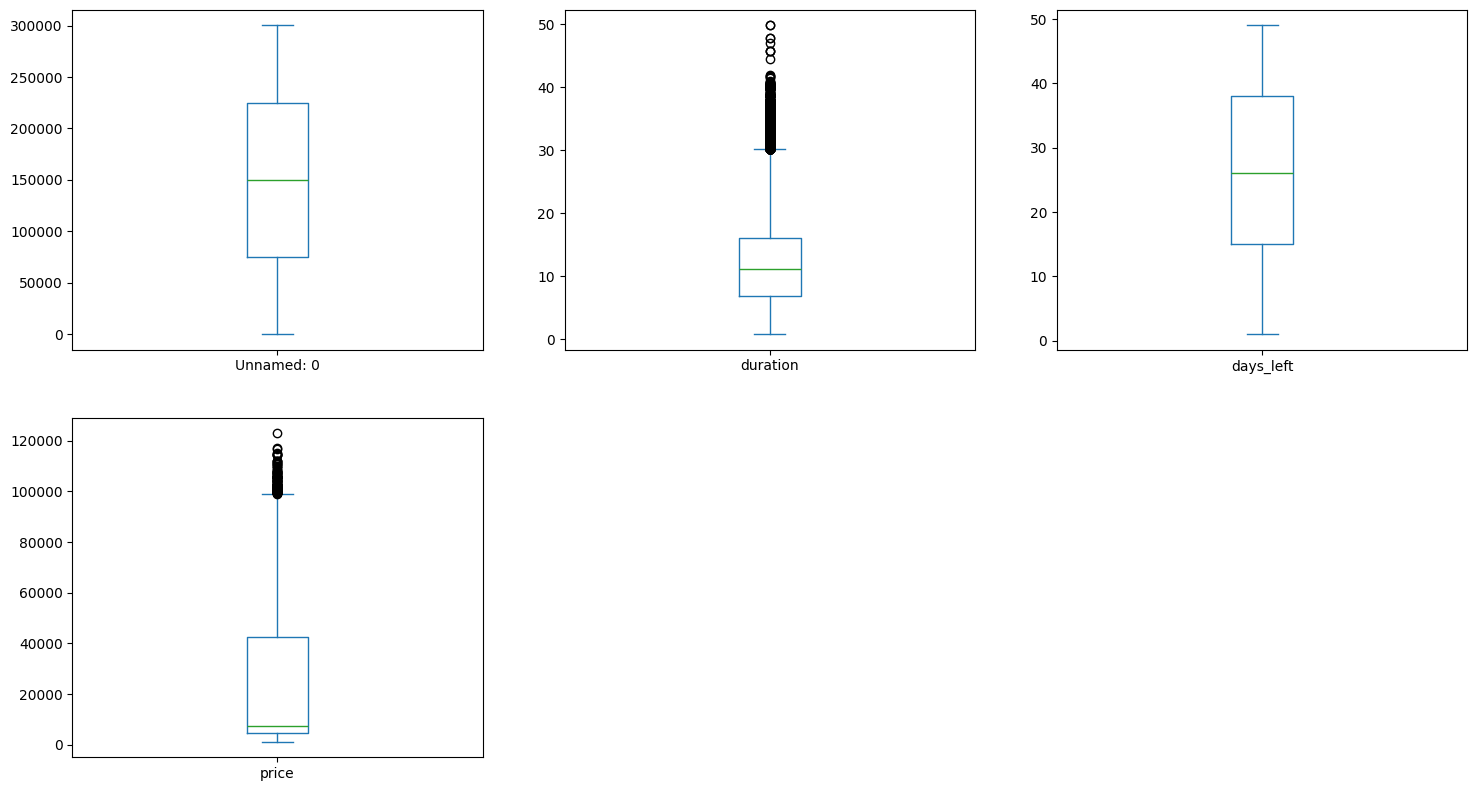

In [ ]:
airlines.plot(kind='box', subplots=True, layout=(3,3), figsize=(18,15))
plt.show()

Terdapat outlier pada duration, sehingga perlu menghapus sebagian dari outlier.

## Univariate Analysis



### Data Katerogikal


#### 1. Fitur airline

           jumlah sampel  persentase
airline                             
Vistara           127859        42.6
Air_India          80892        27.0
Indigo             43120        14.4
GO_FIRST           23173         7.7
AirAsia            16098         5.4
SpiceJet            9011         3.0


<Axes: title={'center': 'airline'}, xlabel='airline'>

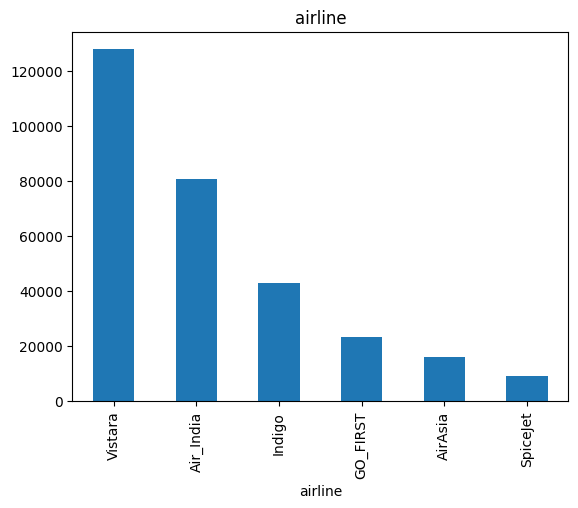

In [ ]:
count = airlines['airline'].value_counts()
percent = 100*airlines['airline'].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)

count.plot(kind='bar', title='airline')

#### 2. Fitur Flight

         jumlah sampel  persentase
flight                            
UK-706            3235         1.1
UK-772            2741         0.9
UK-720            2650         0.9
UK-836            2542         0.8
UK-822            2468         0.8
...                ...         ...
SG-9923              1         0.0
6E-6474              1         0.0
6E-865               1         0.0
G8-705               1         0.0
G8-107               1         0.0

[1561 rows x 2 columns]


<Axes: title={'center': 'flight'}, xlabel='flight'>

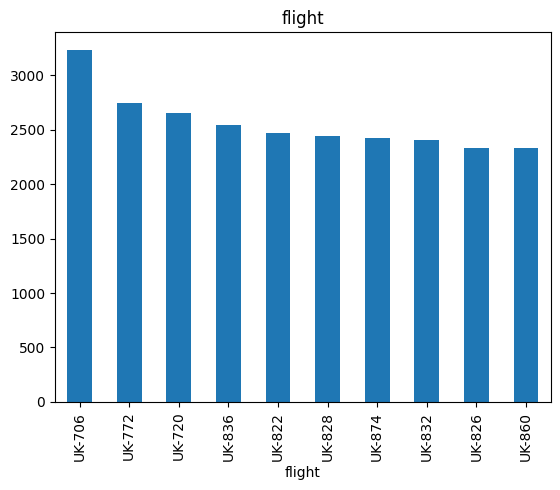

In [ ]:
count = airlines['flight'].value_counts()
percent = 100*airlines['flight'].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)

count[:10].plot(kind='bar', title='flight')

In [ ]:
num_of_flight = len(airlines['flight'].value_counts())
print(f'Num of flight: {num_of_flight}')

Num of flight: 1561


Penerbangan paling sibuk adalah penerbangan UK-706

#### 3. Fitur Source_city

             jumlah sampel  persentase
source_city                           
Delhi                61343        20.4
Mumbai               60896        20.3
Bangalore            52061        17.3
Kolkata              46347        15.4
Hyderabad            40806        13.6
Chennai              38700        12.9


<Axes: title={'center': 'source_city'}, xlabel='source_city'>

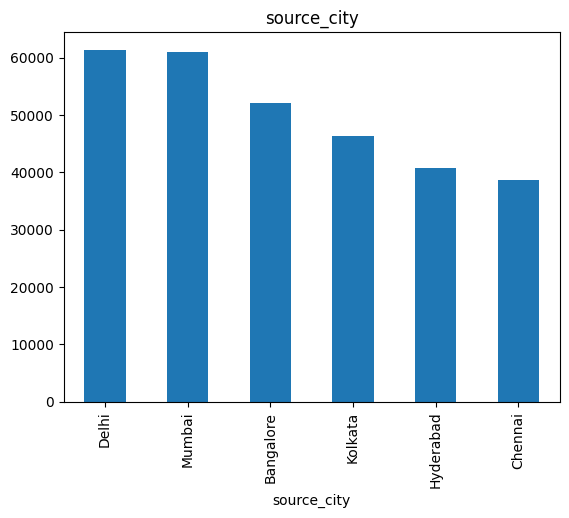

In [ ]:
count = airlines['source_city'].value_counts()
percent = 100*airlines['source_city'].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)

count.plot(kind='bar', title='source_city')

Penerbangan paling banyak terdapat di Kota Delhi yaitu 6 kota tujuan.

#### 4. Fitur Destination_city

                  jumlah sampel  persentase
destination_city                           
Mumbai                    59097        19.7
Delhi                     57360        19.1
Bangalore                 51068        17.0
Kolkata                   49534        16.5
Hyderabad                 42726        14.2
Chennai                   40368        13.4


<Axes: title={'center': 'destination_city'}, xlabel='destination_city'>

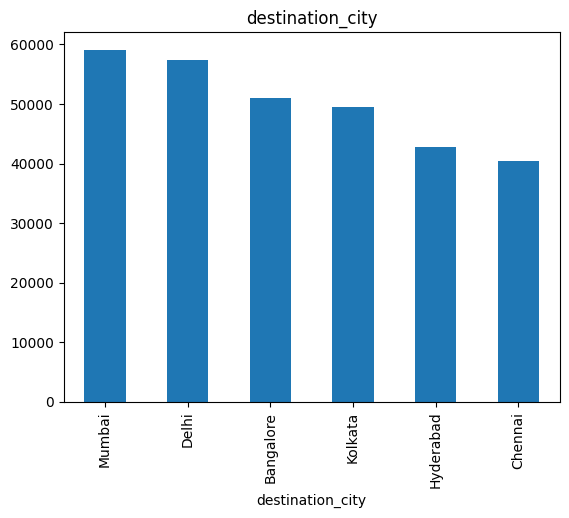

In [ ]:
count = airlines['destination_city'].value_counts()
percent = 100*airlines['destination_city'].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)

count.plot(kind='bar', title='destination_city')

Kota mumbai menjadi penerbangan paling banyak.

#### 5. Fitur Departure_time

                jumlah sampel  persentase
departure_time                           
Morning                 71146        23.7
Early_Morning           66790        22.3
Evening                 65102        21.7
Night                   48015        16.0
Afternoon               47794        15.9
Late_Night               1306         0.4


<Axes: title={'center': 'departure_time'}, xlabel='departure_time'>

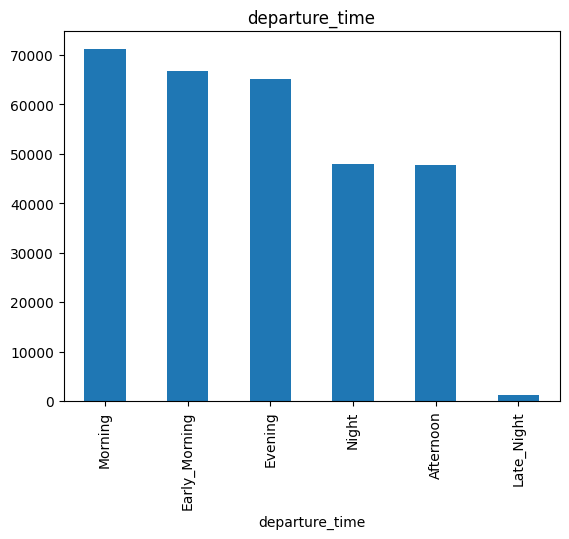

In [ ]:
count = airlines['departure_time'].value_counts()
percent = 100*airlines['departure_time'].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)

count.plot(kind='bar', title='departure_time')

Waktu penerbangann diubah menjadi 6 kategori, dengan penerbangan paling sibuk.

#### Fitur Arrival_time

               jumlah sampel  persentase
arrival_time                            
Night                  91538        30.5
Evening                78323        26.1
Morning                62735        20.9
Afternoon              38139        12.7
Early_Morning          15417         5.1
Late_Night             14001         4.7


<Axes: title={'center': 'arrival_time'}, xlabel='arrival_time'>

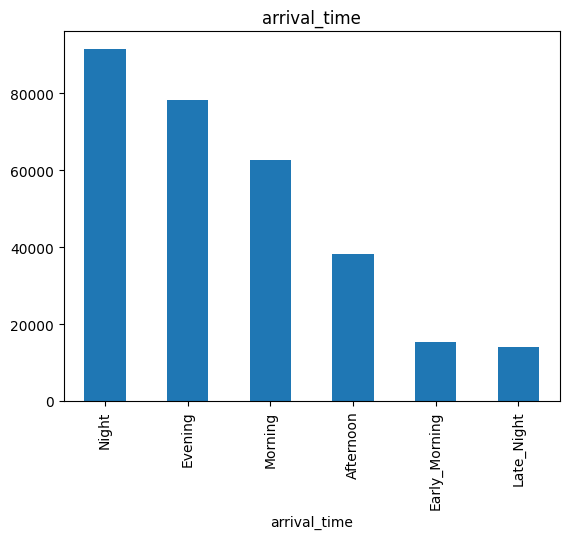

In [ ]:
count = airlines['arrival_time'].value_counts()
percent = 100*airlines['arrival_time'].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)

count.plot(kind='bar', title='arrival_time')

Waktu kedatangan paling banyak yaitu malam hari dengan angka 91.538

#### 7. Fitur stop

             jumlah sampel  persentase
stops                                 
one                 250863        83.6
zero                 36004        12.0
two_or_more          13286         4.4


<Axes: title={'center': 'stops'}, xlabel='stops'>

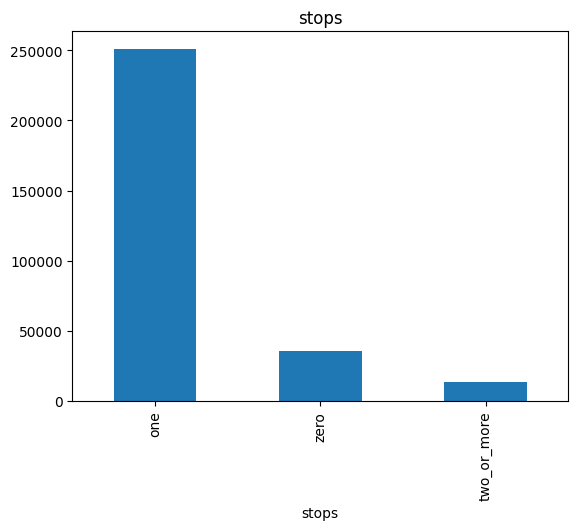

In [ ]:
count = airlines['stops'].value_counts()
percent = 100*airlines['stops'].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)

count.plot(kind='bar', title='stops')

Jumlah Transit penerbangan diubah menjadi 3 kategori, dan penerbangan one-way menjadi penerbangan terbanyak.

#### 8. Fitur Class

          jumlah sampel  persentase
class                              
Economy          206666        68.9
Business          93487        31.1


<Axes: title={'center': 'class'}, xlabel='class'>

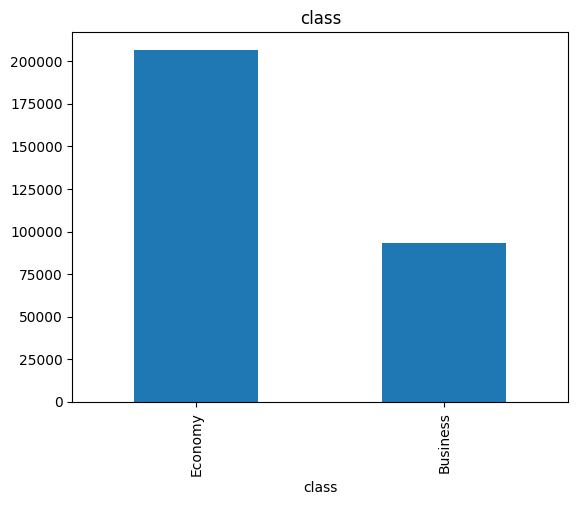

In [ ]:
count = airlines['class'].value_counts()
percent = 100*airlines['class'].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)

count.plot(kind='bar', title='class')

Kelas Ekonomi menjadi kelas paling banyak digunakan mencapai 68,9%.

### Data Numerikal

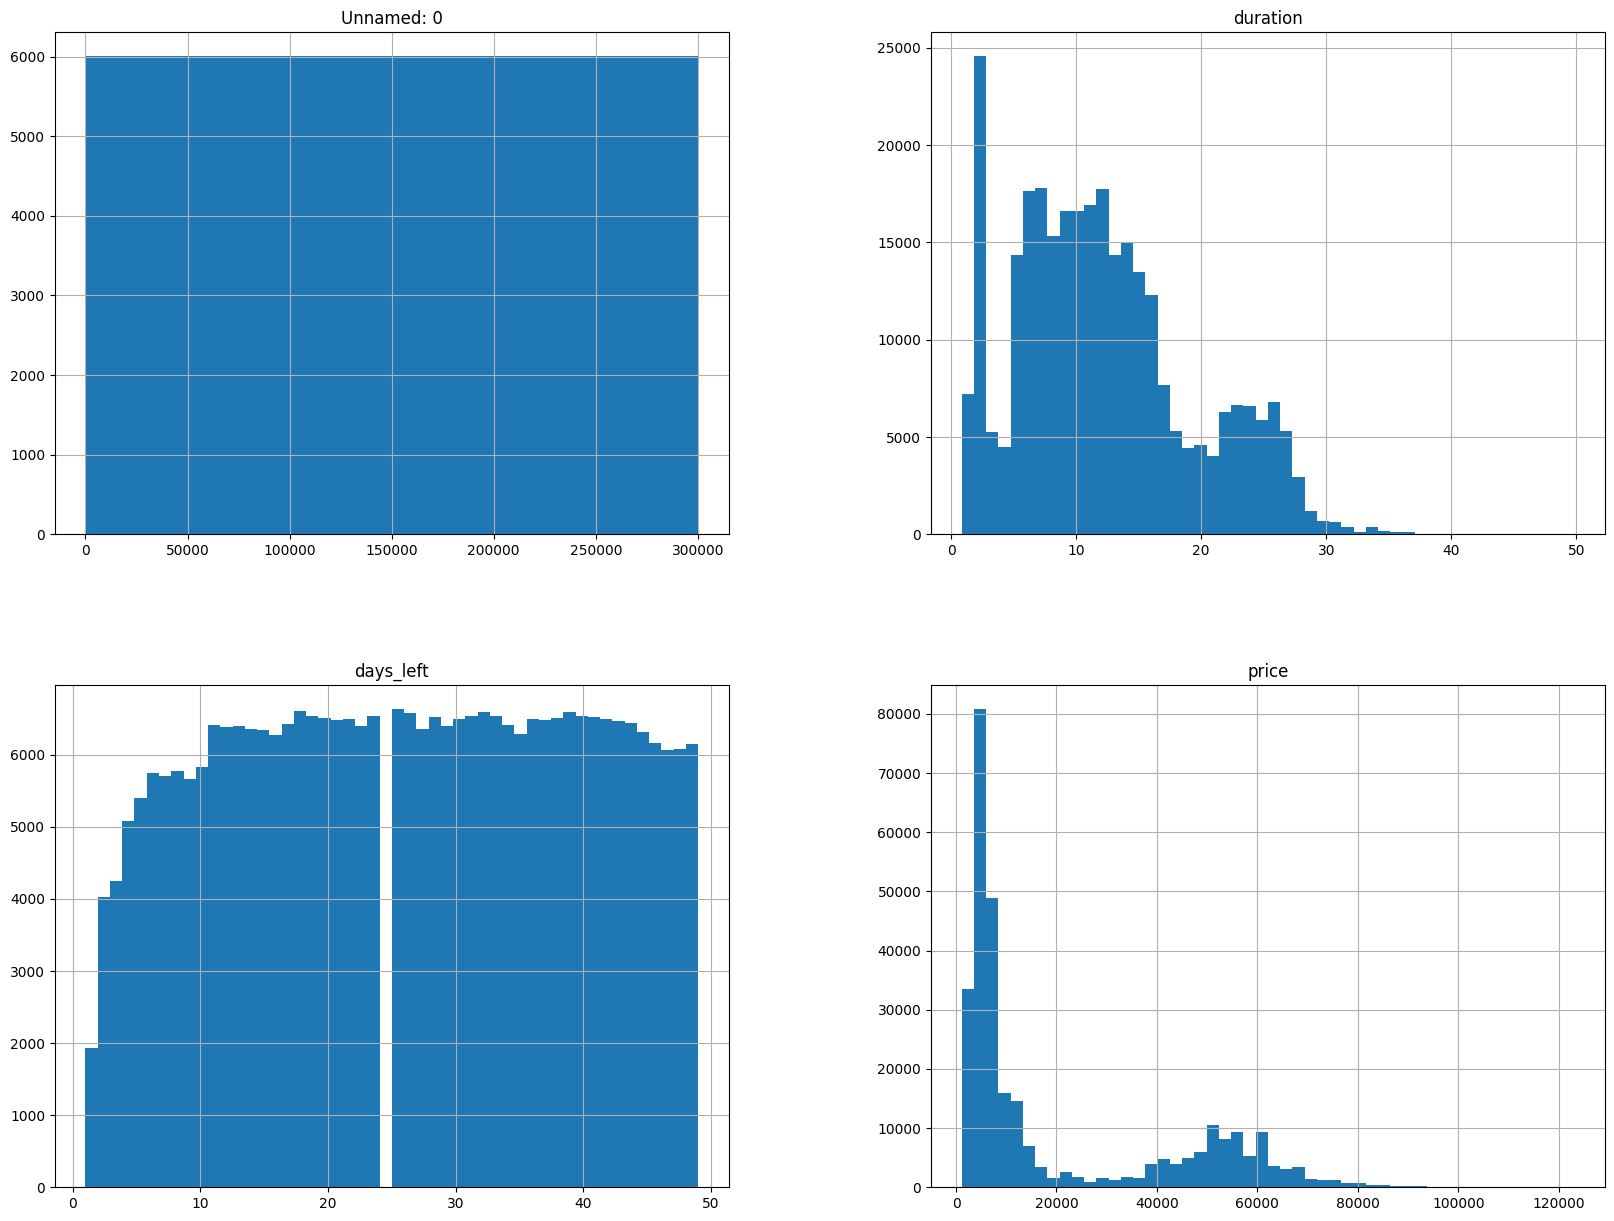

In [ ]:
airlines.hist(bins=50, figsize=(20,15))
plt.show()

Dari histogram "price", dapat disimpulkan bahwa :
* Histogram "price" yang mengalami penurunan seiring dengan semakin banyaknya jumlah sampel (sumbu y).
* Harga tiket cukup tinggi dilihat dari rentang skala puluhan ribu dolar.
*   Setengah harga tiket dibawah $10.000





## Multivariate Analysis

### 8 Kota Asal dan tujuan penerbangan berdasarkan harga

In [ ]:
source_and_dest = airlines.groupby(['source_city', 'destination_city'])['price'].sum().reset_index().sort_values(["price"], ascending=False)
source_and_dest[0:8]

,source_city,destination_city,price
4,Bangalore,Mumbai,299261197
25,Mumbai,Bangalore,298260354
14,Delhi,Mumbai,295931282
29,Mumbai,Kolkata,282022007
27,Mumbai,Delhi,277303264
24,Kolkata,Mumbai,253178558
10,Delhi,Bangalore,250537591
13,Delhi,Kolkata,245439530


Harga tiket paling tinggi dengan kota asal Bangalore dan tujuan Kota Mumbai.

### 6 Penerbangan dan Maskapai berdasarkan Harga

In [ ]:
airline_and_flight = airlines.groupby(['flight', 'airline'])["price"].count().reset_index().sort_values("price", ascending=False)
airline_and_flight[0:6]

,flight,airline,price
1442,UK-706,Vistara,3235
1454,UK-772,Vistara,2741
1445,UK-720,Vistara,2650
1490,UK-836,Vistara,2542
1477,UK-822,Vistara,2468
1483,UK-828,Vistara,2440


<ipython-input-23-0aea3a846368>:3: UserWarning: The palette list has more values (5) than needed (1), which may not be intended.
  ax = sns.barplot(x='flight', y='price', hue='airline', data=airline_and_flight[0:6], palette=colors)


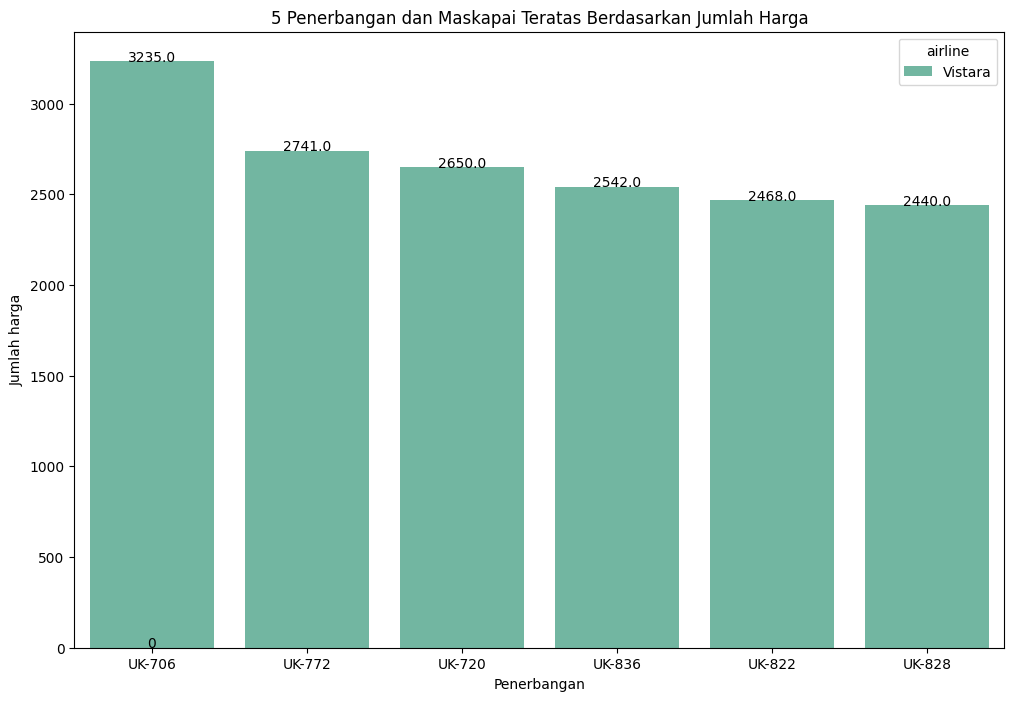

In [ ]:
plt.figure(figsize=(12, 8))
colors = sns.color_palette('Set2', len(airline_and_flight[0:5]))
ax = sns.barplot(x='flight', y='price', hue='airline', data=airline_and_flight[0:6], palette=colors)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black')

plt.xlabel('Penerbangan')
plt.ylabel('Jumlah harga')
plt.title('5 Penerbangan dan Maskapai Teratas Berdasarkan Jumlah Harga')
plt.show()

Penerbangan UK-706 dengan maskapai Vistara Airlines merupakan penerbangan yang paling sering digunakan sekitar 3.235 penerbangan.

### Analisa Penerbangan Kelas Ekonomi

In [ ]:
eco = airlines[airlines['class']=='Economy']

In [ ]:
eco['airline'].value_counts()

,count
airline,
Vistara,67270
Air_India,47994
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


#### Maskapai yang paling banyak digunakan pada kelas ekonomi

Text(0.5, 1.0, 'Maskapai yang paling banyak digunakan pada kelas ekonomi')

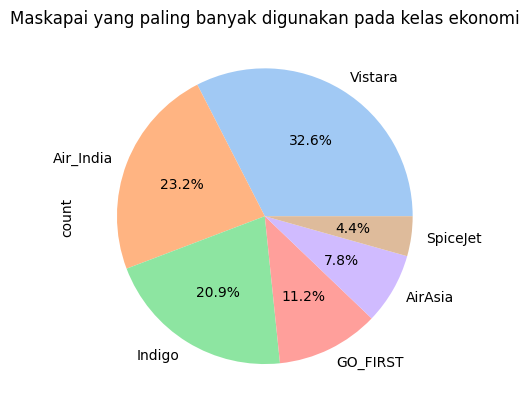

In [ ]:
colors = sns.color_palette('pastel')
eco['airline'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.title('Maskapai yang paling banyak digunakan pada kelas ekonomi')

Maskapai yang paling banyak digunakan pada kelas ekonomi yaitu 32,6%.

#### Total Harga setiap Maskapai Ekonomi

<ipython-input-27-98cc8ba6d5c2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='airline', y='price', data=eco, palette=colors)
<ipython-input-27-98cc8ba6d5c2>:3: UserWarning: The palette list has more values (206666) than needed (6), which may not be intended.
  ax = sns.barplot(x='airline', y='price', data=eco, palette=colors)


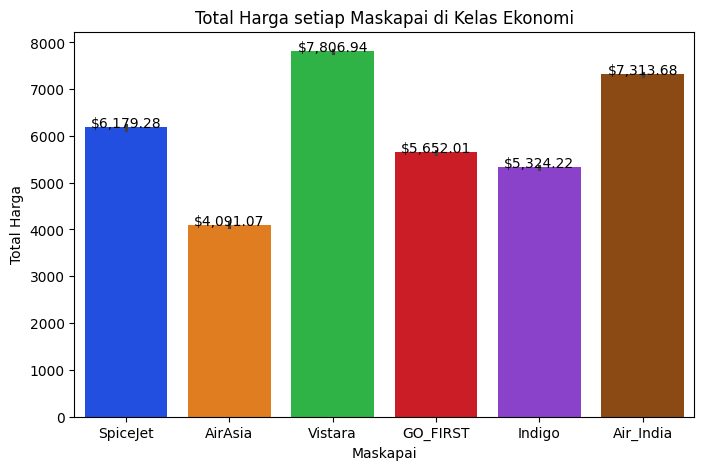

In [ ]:
plt.figure(figsize=(8, 5))
colors = sns.color_palette('bright', len(eco))
ax = sns.barplot(x='airline', y='price', data=eco, palette=colors)

for p in ax.patches:
    ax.annotate(f'${p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black')

plt.xlabel('Maskapai')
plt.ylabel('Total Harga')
plt.title('Total Harga setiap Maskapai di Kelas Ekonomi')

plt.show()

Maskapai Vistara menjadi maskapai dengan total harga tertinggi yaitu $7.806,94.

#### Keberangkatan Kelas Ekonomi

Text(0.5, 1.0, 'Keberangkatan kelas ekonomi')

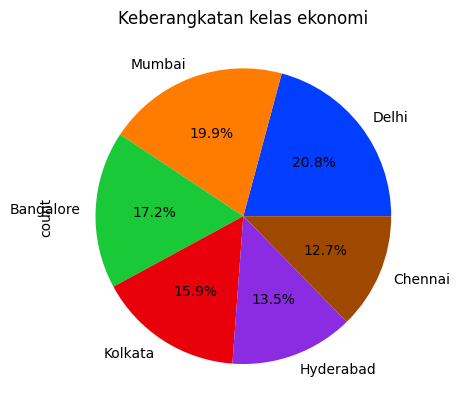

In [ ]:
eco['source_city'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.title('Keberangkatan kelas ekonomi')

Dari Analisa Penerbangan kelas Ekonomi dapat disimpulkan bahwa :
1.   Maskapai Vistara menjadi maskapai dengan total harga tertinggi yaitu $7.806,94.
2.   Keberangkatan kelas ekonomi paling banyak di kota Delhi dengan persentase 20,8%.



### Analisa Penerbangan Kelas Bisnis

In [ ]:
bus = airlines[airlines['class']=='Business']

Text(0.5, 1.0, 'Maskapai yang paling banyak digunakan di kelas bisnis')

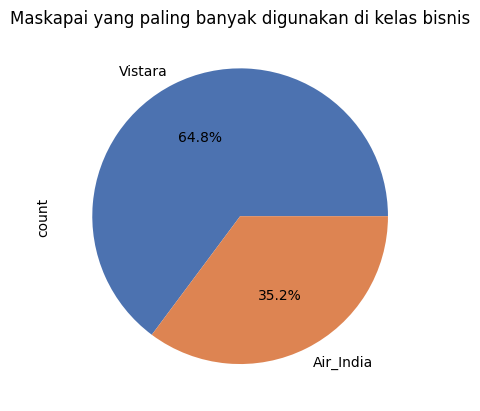

In [ ]:
colors = sns.color_palette('deep')
bus['airline'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.title('Maskapai yang paling banyak digunakan di kelas bisnis')

Maskapai yang paling banyak digunakan di kelas bisnis yaitu 64,8%

#### Harga Tiket penerbangat di kelas bisnis

In [ ]:
bus_price_per_airline = bus.groupby(['airline'])['price'].sum().reset_index().sort_values(by='price', ascending=False)
bus_price_per_airline

,airline,price
1,Vistara,3361297636
0,Air_India,1550516928


#### Jumlah penerbangan maskapai di kelas bisnis

<ipython-input-32-32a1a8400f8b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=colors_count.index, y=colors_count.values, palette=colors)


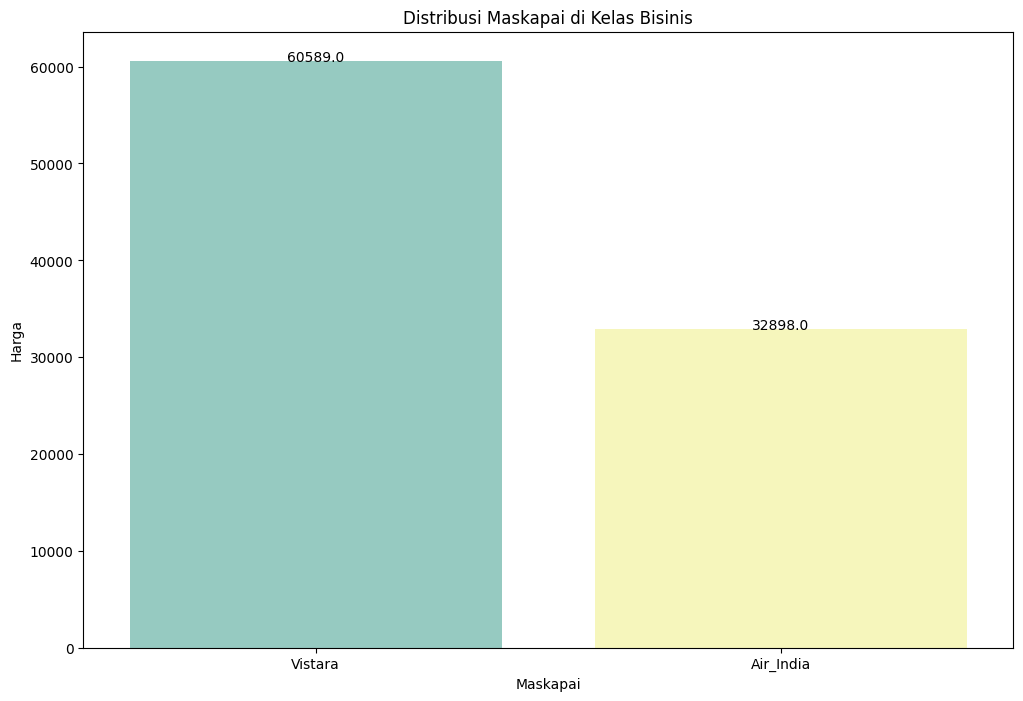

In [ ]:
colors_count = bus['airline'].value_counts()

plt.figure(figsize=(12, 8))
colors = sns.color_palette('Set3', len(colors_count))
ax = sns.barplot(x=colors_count.index, y=colors_count.values, palette=colors)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black')

plt.xlabel('Maskapai')
plt.ylabel('Harga')
plt.title('Distribusi Maskapai di Kelas Bisinis')

plt.show()

Maskapai Vistara menjadi penerbangan terbanyak yaitu 60.589 penerbangan.

#### Keberangkatan Kelas Bisnis

Text(0.5, 1.0, 'Keberangkatan Kelas Bisnis')

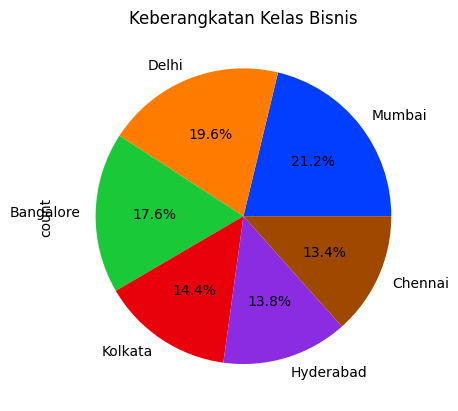

In [ ]:
colors = sns.color_palette('bright')
bus['source_city'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.title('Keberangkatan Kelas Bisnis')

Keberangkatan Kelas Bisnis paling banyak di kota Mumbai dengan persentase 21,1%.

### Perbedaan Harga disetiap Maskapai

In [ ]:
df = airlines.groupby(['airline'])['price'].median()
df

,price
airline,
AirAsia,3276.0
Air_India,11520.0
GO_FIRST,5336.0
Indigo,4453.0
SpiceJet,5654.0
Vistara,15543.0


Harga tiket maskapai paling tinggi yaitu Vistara Airline dengan harga $15.543

<ipython-input-35-af6464f69805>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dm.index, y=dm, palette=colors)
<ipython-input-35-af6464f69805>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = '{:.1f}%'.format(percentages[i])


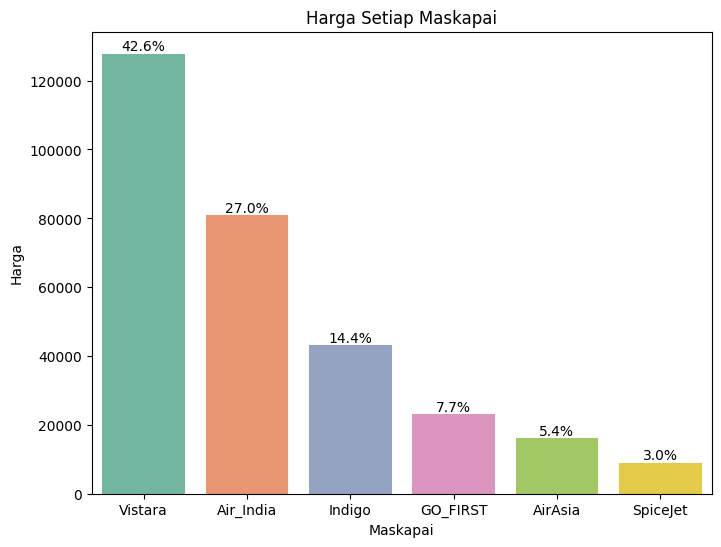

In [ ]:
dm = airlines['airline'].value_counts()
total_customers = len(airlines)

percentages = dm / total_customers * 100

# Memilih Palet Warna
colors = sns.color_palette('Set2', n_colors=len(dm))

plt.figure(figsize=(8, 6))
sns.barplot(x=dm.index, y=dm, palette=colors)

for i, p in enumerate(plt.gca().patches):
    percentage = '{:.1f}%'.format(percentages[i])
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.5
    plt.text(x, y, percentage, ha='center', va='bottom', fontsize=10, color='black')

plt.title('Harga Setiap Maskapai')
plt.xlabel('Maskapai')
plt.ylabel('Harga')

plt.show()

Maskapai Vistara memiliki harga tiket paling tinggi dengan persentase 42,6%

### Perbedaan Harga Tiket disetiap Kelas

<Axes: title={'center': 'Perbedaan Harga Tiket disetiap Kelas'}, ylabel='price'>

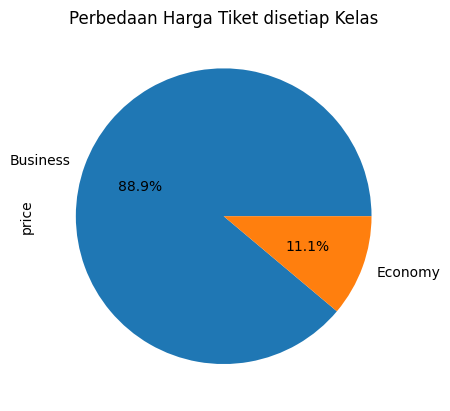

In [ ]:
airlines.groupby(['class'])['price'].mean().plot(kind='pie', title='Perbedaan Harga Tiket disetiap Kelas', autopct='%1.1f%%')

Perbedaan Harga Tiket disetiap Kelas yaitu kelas bisnis jauh lebih mahal 88,9% daripada kelas ekonomi.

### Perubahan harga tiket berdasarkan pada waktu keberangkatan dan kedatangan

Text(0.5, 1.0, 'Harga maskapai berdasarkan waktu kedatangan')

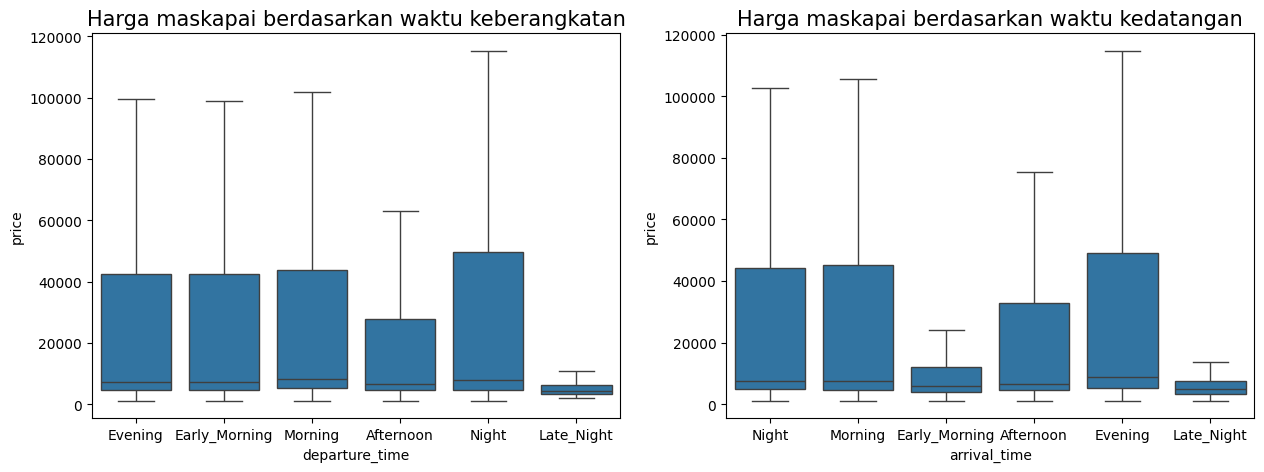

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=airlines, x='departure_time', y='price', showfliers=False).set_title('Harga maskapai berdasarkan waktu keberangkatan', fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(data=airlines, x='arrival_time', y='price', showfliers=False).set_title('Harga maskapai berdasarkan waktu kedatangan', fontsize=15)

### Perubahan Harga dengan Kota keberangkatan dan tujuan

Text(0.5, 0.98, 'Perubahan Harga dengan Kota keberangkatan dan tujuan')

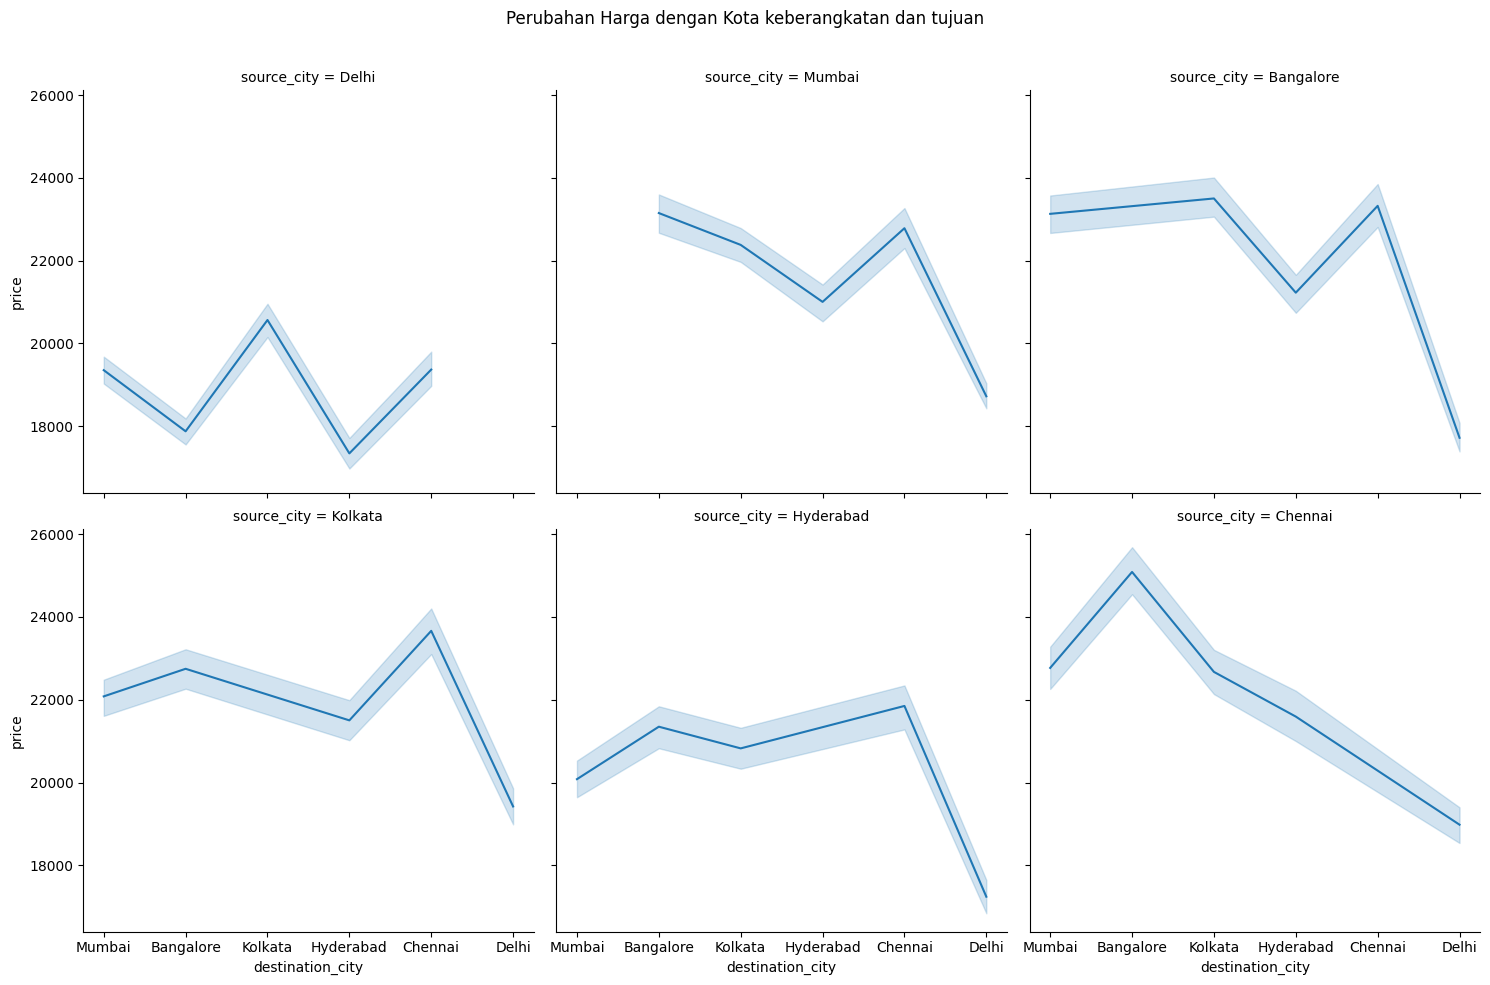

In [ ]:
source_and_dest_price = sns.relplot(col='source_city', y='price', kind='line', x='destination_city', data=airlines, col_wrap=3)
source_and_dest_price.fig.subplots_adjust(top=0.9)
source_and_dest_price.fig.suptitle('Perubahan Harga dengan Kota keberangkatan dan tujuan')

Berdasarkan grafik diatas dapat disimpulkan bahwa penerbangan dengan Kota keberangkatan dan tujuan kota Delhi memiliki harga yang paling murah. Sedangkan penerbangan dengan Kota keberangkatan dan tujuan kota Bangalore memiliki harga yang paling mahal.

### Perubahan Harga Tiket antara Kelas Ekonomi dan Bisnis

Text(0.5, 1.0, 'Maskapai berdasarkan kelas bisnis')

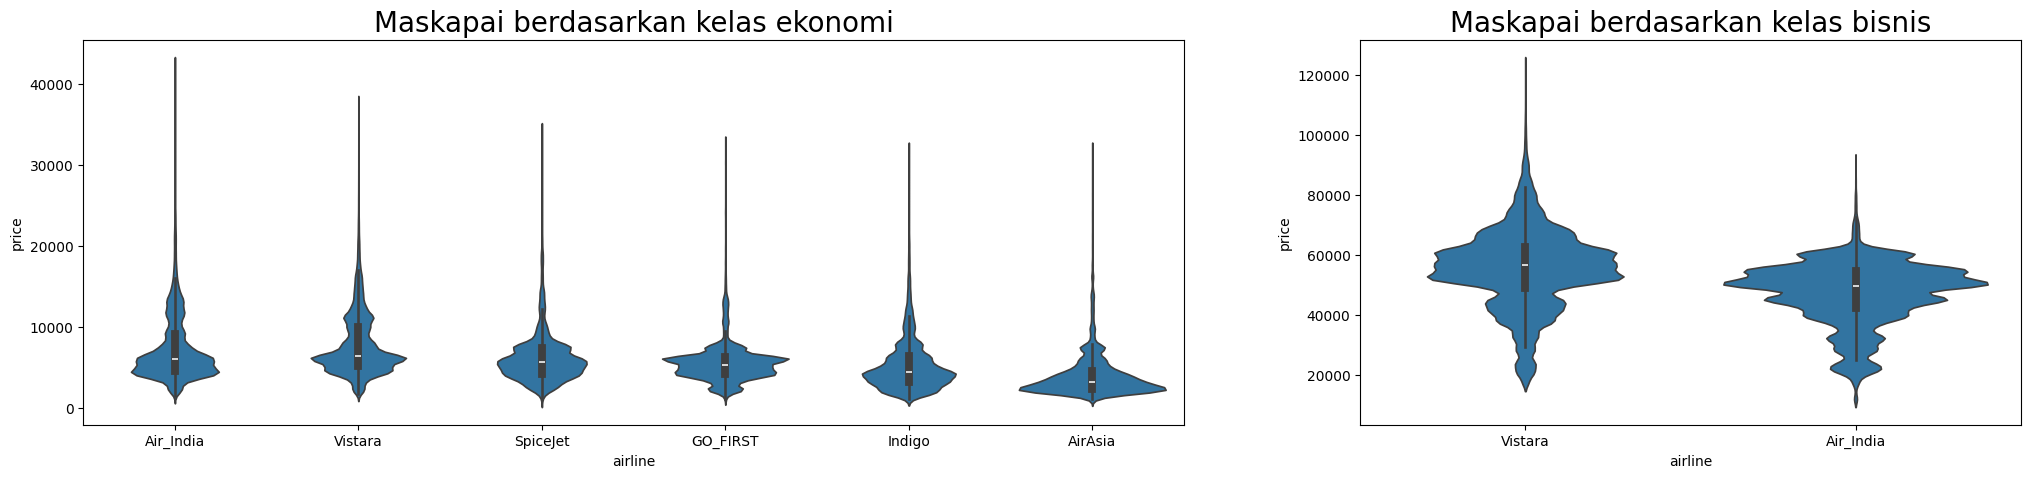

In [ ]:
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))
sns.violinplot(x='airline', y='price', data=airlines.loc[airlines['class']=='Economy'].sort_values(by='price', ascending=False), ax=axs[0])
axs[0].set_title('Maskapai berdasarkan kelas ekonomi', fontsize=20)
sns.violinplot(x='airline', y='price', data=airlines.loc[airlines['class']=='Business'].sort_values(by='price', ascending=False), ax=axs[1])
axs[1].set_title('Maskapai berdasarkan kelas bisnis', fontsize=20)

Dari grafik diatas dapat disimpulkan bahwa, harga tiket setiap pesawat bervariasi tergantung dengan maskapainya. Maskapai dengan kelas ekonomi air india paling mahal, sedangkan AirAsia yang paling terjangkau. Maskapai dengan kelas bisnis, Maskapai Vistara memiliki harga tiket lebih tinggi daripada Air India.

### Perubahan Harga Tiket berdasarkan Pemberhentian Penerbangan

<Axes: title={'center': 'Pemberhentian penerbangan'}, ylabel='count'>

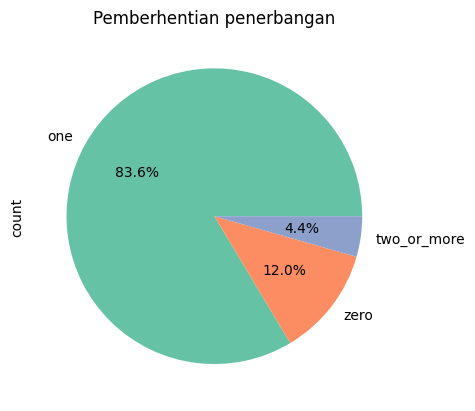

In [ ]:
airlines['stops'].value_counts().plot(kind='pie', autopct='%1.1f%%',
  title='Pemberhentian penerbangan', colors=colors)

Text(0.5, 1.0, 'Harga tiket berdasarkan jumlah pemberhentian untuk setiap maskapai')

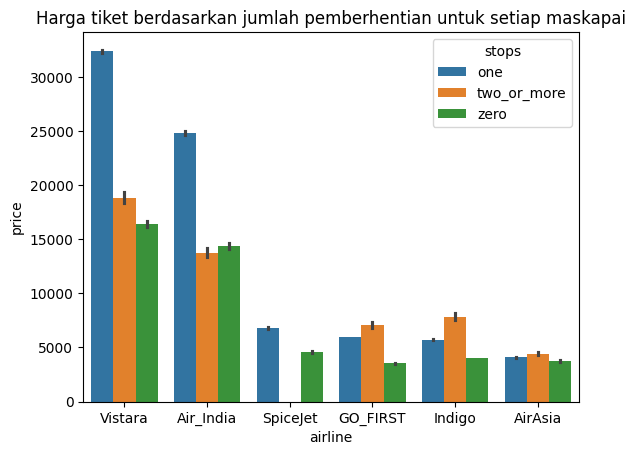

In [ ]:
sns.barplot(y='price', x='airline', hue='stops', data=airlines.sort_values("price", ascending=False))
plt.title("Harga tiket berdasarkan jumlah pemberhentian untuk setiap maskapai")

Penerbangan sekali pemberhentian paling sering digunakan oleh maskapai dengan persentase 83,6%. maskapai yangpaling banyak melakukan sekali pemberhentian yaitu maskapai Vistara.

In [ ]:
df = airlines.copy()

In [ ]:
airlines['source_to_destination'] = airlines['source_city']+' to '+airlines['destination_city']
airlines

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,source_to_destination
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,Delhi to Mumbai
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,Delhi to Mumbai
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,Delhi to Mumbai
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,Delhi to Mumbai
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,Delhi to Mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,Chennai to Hyderabad
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,Chennai to Hyderabad
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,Chennai to Hyderabad
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,Chennai to Hyderabad


In [ ]:
airlines.groupby(['source_to_destination', 'airline'])['price'].size().reset_index().sort_values(by='price', ascending=False)

,source_to_destination,airline,price
89,Delhi to Mumbai,Vistara,5840
165,Mumbai to Delhi,Vistara,5812
11,Bangalore to Delhi,Vistara,5423
29,Bangalore to Mumbai,Vistara,5380
65,Delhi to Bangalore,Vistara,5379
...,...,...,...
46,Chennai to Hyderabad,SpiceJet,51
44,Chennai to Hyderabad,GO_FIRST,38
97,Hyderabad to Chennai,GO_FIRST,38
16,Bangalore to Hyderabad,SpiceJet,31


### Mean harga dan durasi penerbangan dengan kota asal ke kota tujuan

In [ ]:
mean_harga = airlines.groupby(['source_to_destination'])['price'].mean().reset_index().sort_values(by='price', ascending=False)
mean_harga[0:8]

,source_to_destination,price
5,Chennai to Bangalore,25081.850454
21,Kolkata to Chennai,23660.361040
3,Bangalore to Kolkata,23500.061229
0,Bangalore to Chennai,23321.850078
25,Mumbai to Bangalore,23147.873807
4,Bangalore to Mumbai,23128.618672
26,Mumbai to Chennai,22781.899112
9,Chennai to Mumbai,22765.849647


### Jumlah Pemberhentian untuk Sekali Jalan

<ipython-input-46-bb05b8712945>:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.countplot(x='source_to_destination', hue='stops', data=airlines, palette=colors)


<Figure size 640x480 with 0 Axes>

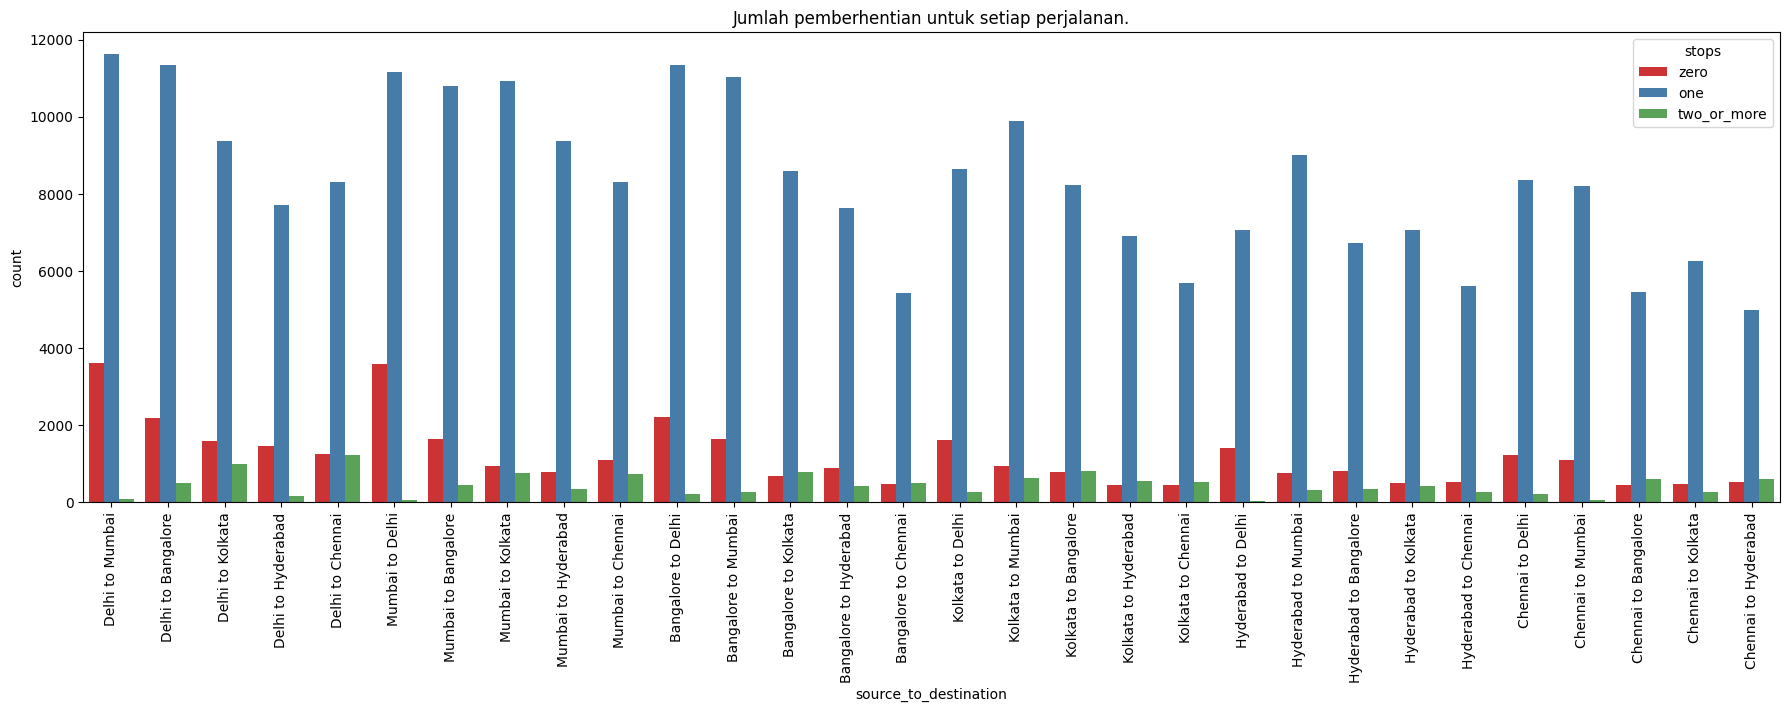

In [ ]:
colors = sns.color_palette('Set1', n_colors=len(dm))
plt.clf()
plt.figure(figsize=(18,7))
sns.countplot(x='source_to_destination', hue='stops', data=airlines, palette=colors)
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('Jumlah pemberhentian untuk setiap perjalanan.')
plt.show()

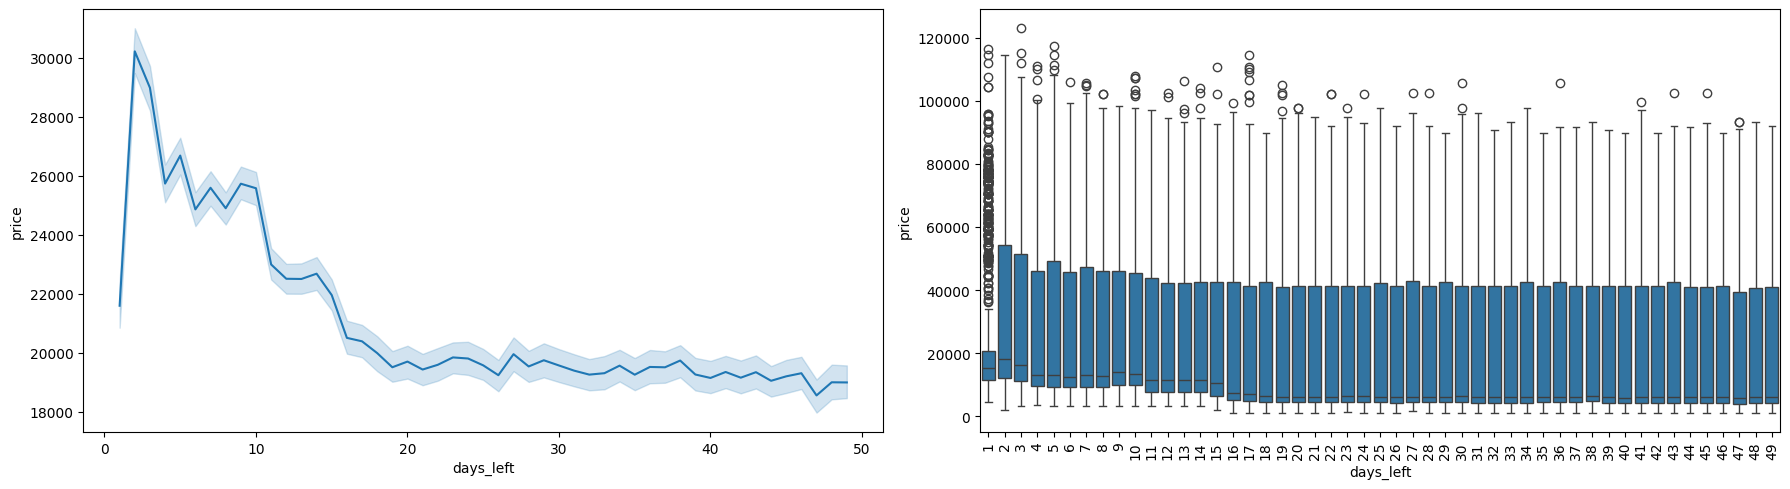

In [ ]:
days_left = airlines.groupby(['days_left'])['price'].mean()

fig, axs = plt.subplots(1,2,figsize=(18,5))
plt.tight_layout()
sns.lineplot(x='days_left',y='price', data=airlines, ax=axs[0])
sns.boxplot(x='days_left', y='price', data=airlines, ax=axs[1])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Berdasarkan grafik diatas dapat disimpulkan bahwa peningkatan harga tiket maskapai terjadi beberapa hari sebelum keberangkatan, diikuti penurunan yang sangat signifikan menjelang 3 hari terakhir sebelum keberangkatan. Grafik ini sangat berguna bagi maskapai, dengan tujuan mengurangi harga menjelang hari pemberangkatan, sehingga maskapai bisa meminimalisir kursi yang kosong.

In [ ]:
airlines['days_left'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [ ]:
def offer(x):
    if x['days_left']==1:
        return ("5% offer")
    elif x['days_left']>=2 and x['days_left']<=8:
        return('7% offer')
    elif x['days_left']>8 and x['days_left']>=15:
        return('10% offer')
    else:
        return('no offer')

airlines['offer']=airlines.apply(offer,axis=1)

Text(0.5, 1.0, 'Penawaran setiap tiket berdasarkan waktu booking')

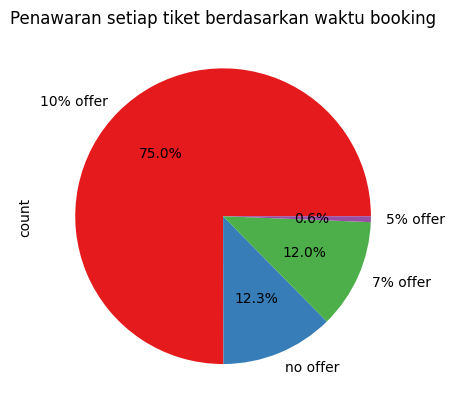

In [ ]:
airlines['offer'].value_counts().plot(kind='pie',autopct = "%1.1f%%",colors = colors)
plt.title('Penawaran setiap tiket berdasarkan waktu booking')

Berdasarkan diagram diatas, dapat disimpulkan bahwa kebanyakan pesawat dipesan pada penawaran 10% dengan presentase 75%. Pemesanan dengan penawaran 5% merupakan pemesanan yang paling sedikit pembelian tiket penerbangan.





In [ ]:
city_count = dict(airlines['source_city'].value_counts())
city_count

{'Delhi': 61343,
 'Mumbai': 60896,
 'Bangalore': 52061,
 'Kolkata': 46347,
 'Hyderabad': 40806,
 'Chennai': 38700}

In [ ]:
def offer_city(count):
    if  count>=60000:
        return('offer 5%')
    if   45000 <= count < 60000:
         return('offer 7%')
    if   30000<= count <45000:
        return('offer 10%')
    else:
        return('no offer')

airlines['offer_city']=airlines['source_city'].map(city_count).apply(offer_city)
airlines

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,source_to_destination,offer,offer_city
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,Delhi to Mumbai,5% offer,offer 5%
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,Delhi to Mumbai,5% offer,offer 5%
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,Delhi to Mumbai,5% offer,offer 5%
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,Delhi to Mumbai,5% offer,offer 5%
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,Delhi to Mumbai,5% offer,offer 5%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,Chennai to Hyderabad,10% offer,offer 10%
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,Chennai to Hyderabad,10% offer,offer 10%
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,Chennai to Hyderabad,10% offer,offer 10%
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,Chennai to Hyderabad,10% offer,offer 10%


# Data Preparation

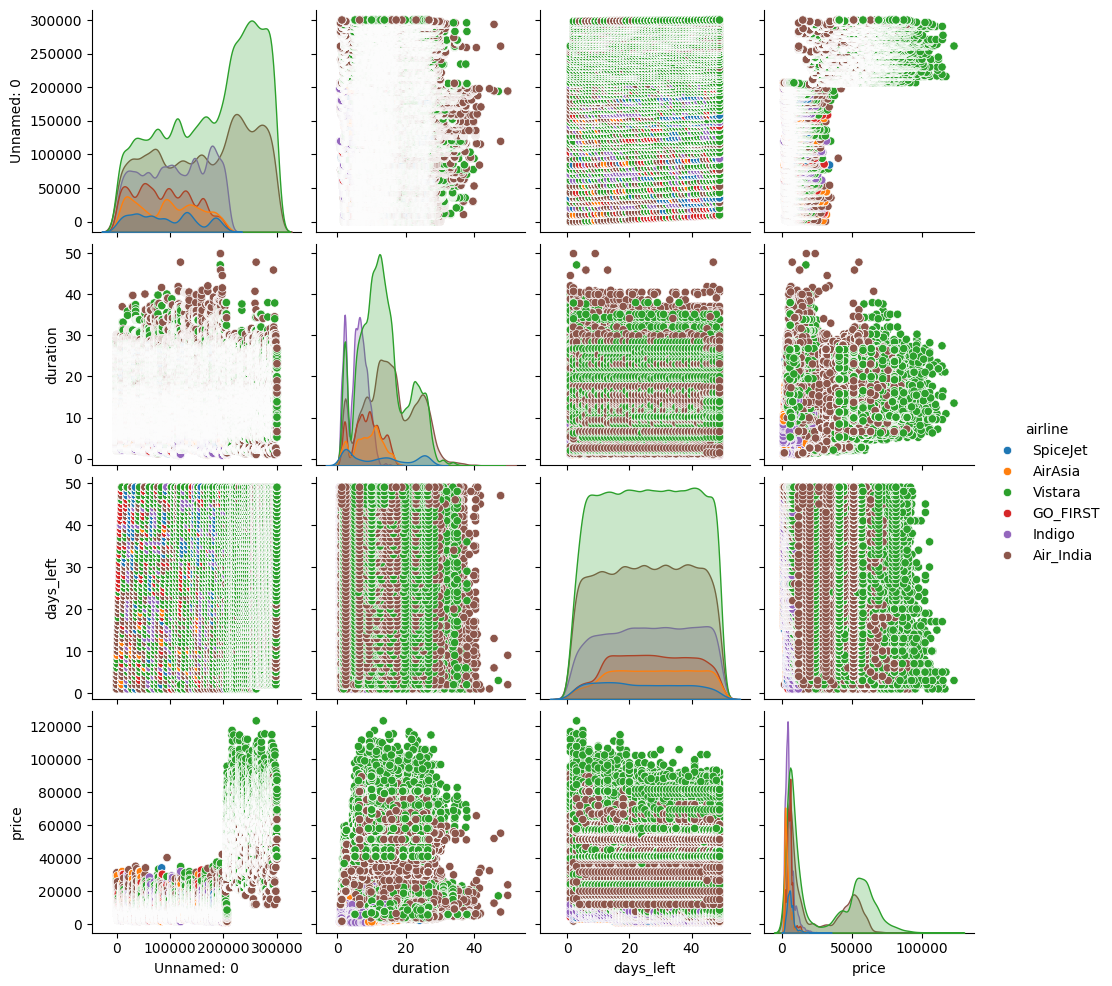

In [ ]:
sns.pairplot(df, hue='airline')

In [ ]:
duplicated = df.duplicated()
duplicated.sum()

0

In [ ]:
df.describe(include='object')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


In [ ]:
df['airline'].value_counts()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['airline'] = label_encoder.fit_transform(df['airline'])
df['source_city'] = label_encoder.fit_transform(df['source_city'])
df['departure_time'] = label_encoder.fit_transform(df['departure_time'])
df['stops'] = label_encoder.fit_transform(df['stops'])
df['arrival_time'] = label_encoder.fit_transform(df['arrival_time'])
df['destination_city'] = label_encoder.fit_transform(df['destination_city'])
df['class'] = label_encoder.fit_transform(df['class'])

In [ ]:
df.drop(['Unnamed: 0', 'flight'], axis=1, inplace=True)
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955


In [ ]:
correlation_with_price = df.corr()['price'].sort_values(ascending=False)
print(correlation_with_price)

price               1.000000
airline             0.243358
duration            0.204222
departure_time      0.058319
arrival_time        0.042043
destination_city    0.004795
source_city         0.004594
days_left          -0.091949
stops              -0.202620
class              -0.937860
Name: price, dtype: float64


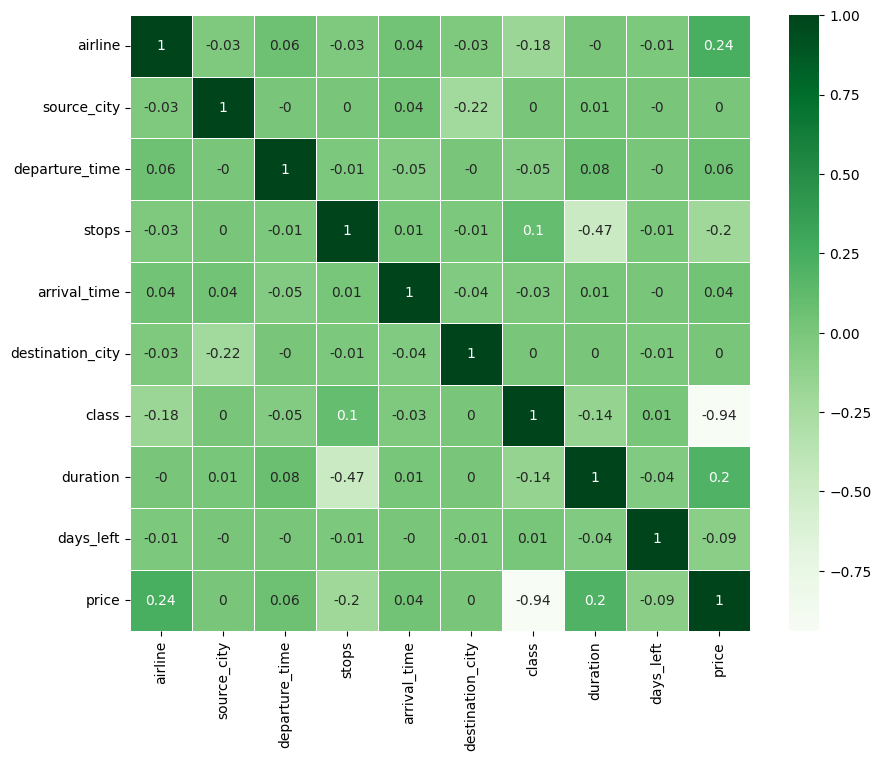

<Figure size 2000x2000 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='Greens', linewidths=0.5, )
plt.figure(figsize=(20,20))
plt.show()

In [ ]:
df.mean()

,0
airline,3.104873
source_city,2.577592
departure_time,2.417337
stops,0.284168
arrival_time,3.074086
destination_city,2.588303
class,0.688536
duration,12.221021
days_left,26.004751
price,20889.660523


In [ ]:
X = df.drop(['price'], axis=1).values
y = df.price.values

## Standardisasi

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit_transform(X)
X = pd.DataFrame(scaler)

In [ ]:
X.describe().T[['min', 'mean', 'std', '50%', 'max']].style.background_gradient(axis=1)

,min,mean,std,50%,max
0,0.000000,0.620975,0.366653,0.600000,1.000000
1,0.000000,0.515518,0.350352,0.400000,1.000000
2,0.000000,0.483467,0.350855,0.400000,1.000000
3,0.000000,0.142084,0.332912,0.000000,1.000000
4,0.000000,0.614817,0.348333,0.800000,1.000000
5,0.000000,0.517661,0.348909,0.600000,1.000000
6,0.000000,0.688536,0.463093,1.000000,1.000000
7,0.000000,0.232470,0.146775,0.212653,1.000000
8,0.000000,0.520932,0.282521,0.520833,1.000000


# Modeling

In [ ]:
# Memisahkan data training dan data testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [ ]:
X_train.shape

(210107, 9)

In [ ]:
y_train.shape

(210107,)

In [ ]:
X_test.shape

(90046, 9)

In [ ]:
y_test.shape

(90046,)

In [ ]:
from sklearn.metrics import r2_score, \
mean_absolute_error, \
mean_squared_error, \
mean_absolute_percentage_error

In [ ]:
# analisis model
models_name = ["Linear Regression",
                 "Decision Tree Regressor",
                 "Random Forest Regressor",
                 "XGBRegressor"]
eval_matrices = ['MAE', 'MSE', 'R2 Squared']
models = pd.DataFrame(index=eval_matrices,
		      columns=models_name)

## Regresi Linear

In [ ]:
from sklearn import linear_model
LR = linear_model.LinearRegression()

LR.fit(X_train, y_train)
print("train score: {:.2f}".format(LR.score(X_train,y_train)))
print("test score: {:.2f}".format(LR.score(X_train,y_train)))
y_pred = LR.predict(X_test)
LR_pred = pd.DataFrame({"y_test":y_test,'y_pred':y_pred})

models.loc['Linear Regression', 'R2'] = r2_score(y_test, y_pred)
print("r2 score: {:.2f}".format(models.loc['Linear Regression', 'R2']))
models.loc['Linear Regression', 'MAE'] = mean_absolute_error(y_test,y_pred)
print("MAE: {:.2f}".format(models.loc['Linear Regression', 'MAE']))
models.loc['Linear Regression', 'MSE'] = mean_squared_error(y_test,y_pred)
print("MSE: {:.2f}".format(models.loc['Linear Regression', 'MSE']))

train score: 0.90
test score: 0.90
r2 score: 0.90
MAE: 4626.10
MSE: 49071365.66


In [ ]:
LR.intercept_

50524.710548725474

In [ ]:
LR.coef_

array([  4777.2263023 ,    530.48142678,    181.38323297,  -6570.89070518,
          935.96472881,    608.00391719, -44561.64987871,   4576.69954021,
        -6318.61762484])

## Decision Tree

In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

Rtree = DecisionTreeRegressor(criterion='friedman_mse', max_depth=10, max_features=9, random_state=42)

Rtree.fit(X_train, y_train)
y_pred = Rtree.predict(X_test)
Rtree_pred = pd.DataFrame({"y_test":y_test,'y_pred':y_pred})
print("train score: {:.2f}".format(Rtree.score(X_train,y_train)))
print("test score: {:.2f}".format(Rtree.score(X_train,y_train)))

models.loc['Decision Tree Regressor', 'R2'] = r2_score(y_test, y_pred)
print("r2 score: {:.2f}".format(models.loc['Decision Tree Regressor', 'R2']))
models.loc['Decision Tree Regressor', 'MAE'] = mean_absolute_error(y_test,y_pred)
print("MAE: {:.2f}".format(models.loc['Decision Tree Regressor', 'MAE']))
models.loc['Decision Tree Regressor', 'MSE'] = mean_squared_error(y_test,y_pred)
print("MSE: {:.2f}".format(models.loc['Decision Tree Regressor', 'MSE']))

train score: 0.96
test score: 0.96
r2 score: 0.96
MAE: 2542.72
MSE: 20634995.41


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, max_features=9)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
Rforest_pred = pd.DataFrame({"y_test":y_test,'y_pred':y_pred})
print("train score: {:.2f}".format(rf_model.score(X_train,y_train)))
print("test score: {:.2f}".format(rf_model.score(X_train,y_train)))

models.loc['Random Forest Regressor', 'R2'] = r2_score(y_test, y_pred)
print("r2 score: {:.2f}".format(models.loc['Random Forest Regressor', 'R2']))
models.loc['Random Forest Regressor', 'MAE'] = mean_absolute_error(y_test,y_pred)
print("MAE: {:.2f}".format(models.loc['Random Forest Regressor', 'MAE']))
models.loc['Random Forest Regressor', 'MSE'] = mean_squared_error(y_test,y_pred)
print("MSE: {:.2f}".format(models.loc['Random Forest Regressor', 'MSE']))

train score: 0.96
test score: 0.96
r2 score: 0.96
MAE: 2452.36
MSE: 19174225.35


## Xg Boosting (Extreme Gradient Boosting)

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
xgb_pred = pd.DataFrame({"y_test":y_test,'y_pred':y_pred})
print("train score: {:.2f}".format(xgb.score(X_train,y_train)))
print("test score: {:.2f}".format(xgb.score(X_train,y_train)))

models.loc['XGBRegressor', 'R2'] = r2_score(y_test, y_pred)
print("r2 score: {:.2f}".format(models.loc['XGBRegressor', 'R2']))
models.loc['XGBRegressor', 'MAE'] = mean_absolute_error(y_test,y_pred)
print("MAE: {:.2f}".format(models.loc['XGBRegressor', 'MAE']))
models.loc['XGBRegressor', 'MSE'] = mean_squared_error(y_test,y_pred)
print("MSE: {:.2f}".format(models.loc['XGBRegressor', 'MSE']))

train score: 0.98
test score: 0.98
r2 score: 0.98
MAE: 2024.37
MSE: 12515786.00


# Evaluasi

In [ ]:
eval = pd.DataFrame(columns=eval_matrices,
                    index = models_name)

eval.index.name = 'Model'

model_dict = {models_name[0] : LR,
              models_name[1] : Rtree,
              models_name[2] : rf_model,
              models_name[3] : xgb}

for name, model in model_dict.items():
    eval.loc[name, eval_matrices[2]] = r2_score(y_test, model.predict(X_test))
    eval.loc[name, eval_matrices[0]] = mean_absolute_error(y_test, model.predict(X_test))
    eval.loc[name, eval_matrices[1]] = mean_squared_error(y_test, model.predict(X_test))

# Berfungsi untuk menyorot nilai MSE minimum, MAE, dan nilai R2 Squared maksimum dan membuat font menjadi tebal
def highlight_min_max(val):
    style = ''
    if isinstance(val, (int, float)):
        if val == eval['MSE'].min():
            style += 'background-color: rgba(0, 128, 0, 0.3); color: black; font-weight: bold;'
        if val == eval['MAE'].min():
            style += 'background-color: rgba(0, 128, 0, 0.3); color: black; font-weight: bold;'
        if val == eval['R2 Squared'].max():
            style += 'background-color: rgba(0, 0, 128, 0.3); color: white; font-weight: bold;'
    return style

styled_eval = eval.style.applymap(highlight_min_max)
styled_eval

<ipython-input-78-7a044078454b>:28: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_eval = eval.style.applymap(highlight_min_max)


,MAE,MSE,R2 Squared
Model,,,
Linear Regression,4626.099184,49071365.664415,0.904654
Decision Tree Regressor,2542.718573,20634995.406865,0.959906
Random Forest Regressor,2452.356486,19174225.345795,0.962744
XGBRegressor,2024.367676,12515786.000000,0.975682


In [ ]:
train_eval = pd.DataFrame(columns=eval_matrices,
                    index = models_name)

train_eval.index.name = 'Model'

model_dict = {models_name[0] : LR,
              models_name[1] : Rtree,
              models_name[2] : rf_model,
              models_name[3] : xgb}

for name, model in model_dict.items():
    train_eval.loc[name, eval_matrices[2]] = r2_score(y_train, model.predict(X_train))
    train_eval.loc[name, eval_matrices[0]] = mean_absolute_error(y_train, model.predict(X_train))
    train_eval.loc[name, eval_matrices[1]] = mean_squared_error(y_train, model.predict(X_train))

train_eval

,MAE,MSE,R2 Squared
Model,,,
Linear Regression,4652.171711,49176432.669192,0.904588
Decision Tree Regressor,2503.783806,19769902.507155,0.961642
Random Forest Regressor,2421.718067,18475244.930961,0.964154
XGBRegressor,1969.739136,11581469.0,0.97753


## Visualisasi Matriks Evaluasi

In [ ]:
# MAE Visualization
mae = pd.DataFrame(columns=['train', 'test'],
                    index = models_name)

mae['train'] = train_eval['MAE']
mae['test'] = eval['MAE']

# MSE Visualization
mse = pd.DataFrame(columns=['train', 'test'],
                    index = models_name)

mse['train'] = train_eval['MSE']
mse['test'] = eval['MSE']

# R Squared Visualization
r2 = pd.DataFrame(columns=['train', 'test'],
                    index = models_name)

r2['train'] = train_eval['R2 Squared']
r2['test'] = eval['R2 Squared']

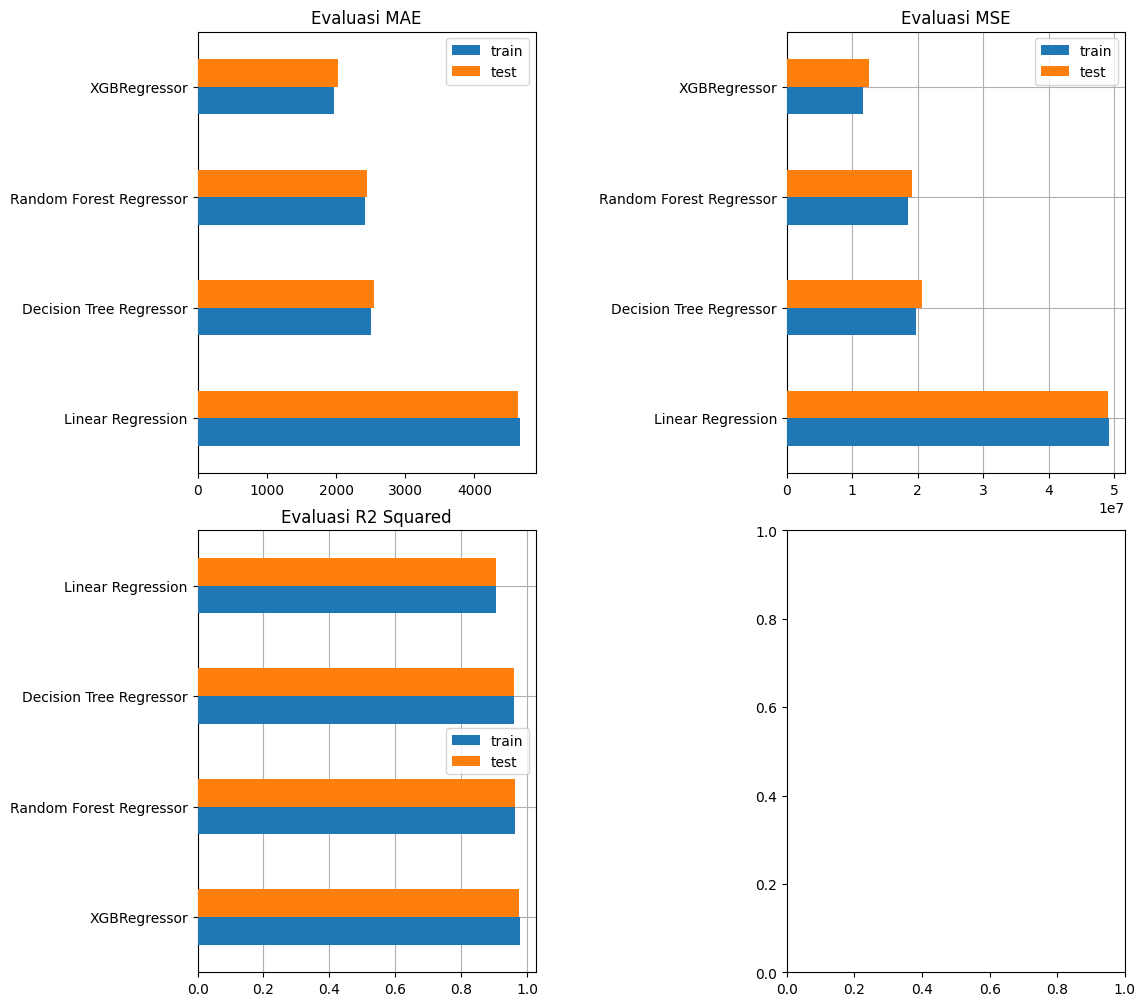

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(10,10))

fig.tight_layout(h_pad=2, w_pad=15)
ax[0,0].grid(zorder=0)
mae.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax[0,0], zorder=3)
ax[0,0].set_title('Evaluasi MAE')

mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax[0,1], zorder=3)
ax[0,1].grid(zorder=0)
ax[0,1].set_title('Evaluasi MSE')

r2.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax[1,0], zorder=3)
ax[1,0].grid(zorder=0)
ax[1,0].set_title('Evaluasi R2 Squared')

plt.show()

## Prediction Testing

In [ ]:
prediksi = X_test.iloc[0:50].copy()
pred_dict = {'y_true':y_test[0:50]}
for name, model in model_dict.items():
    pred_dict[name] = model.predict(prediksi).round(2)

pred_df = pd.DataFrame(pred_dict)

In [ ]:
pred_df.head()

,y_true,Linear Regression,Decision Tree Regressor,Random Forest Regressor,XGBRegressor
0,7366,4582.69,5290.06,5287.92,5600.160156
1,64831,52858.86,65476.45,65412.60,68778.031250
2,6195,7883.43,6656.12,6711.39,6072.109863
3,60160,56146.90,54465.31,54546.30,55867.441406
4,6578,6654.40,5290.06,5287.92,5848.160156


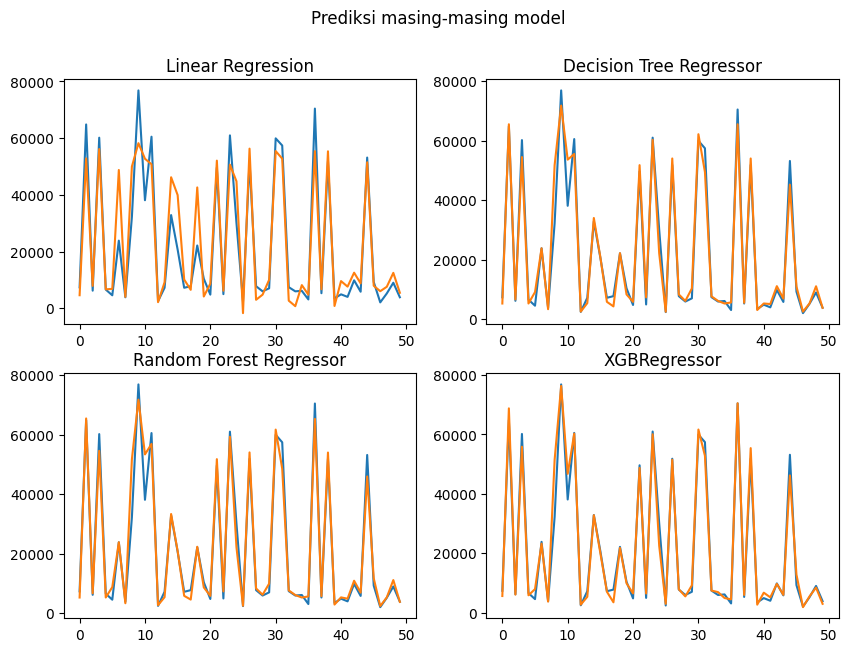

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(10,7))
fig.suptitle('Prediksi masing-masing model')
axs[0,0].set_title('Linear Regression')
axs[0,0].plot(pred_df[['y_true','Linear Regression']])
axs[0,1].set_title('Decision Tree Regressor')
axs[0,1].plot(pred_df[['y_true','Decision Tree Regressor']])
axs[1,0].set_title('Random Forest Regressor')
axs[1,0].plot(pred_df[['y_true','Random Forest Regressor']])
axs[1,1].set_title('XGBRegressor')
axs[1,1].plot(pred_df[['y_true','XGBRegressor']])
plt.show()